In [8]:
# Imports
from functions import *
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
from datascience import *
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
import random

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [4]:
housing = pd.read_csv('Housing.csv')
housing_columns = housing.columns
housing_arr = housing.to_numpy()

In [5]:
conditions = [housing_arr == "no", housing_arr == "yes", housing_arr == 'furnished', housing_arr == 'semi-furnished', housing_arr == 'unfurnished']
values = [0, 1, 2, 1, 0]

housing_arr = np.select(conditions, values, housing_arr).astype('int')

In [9]:
housing_arr = standardize_data(housing_arr)

In [10]:
trials = 1000
results = pd.DataFrame([simulate(SimpleImputer(missing_values=np.nan, strategy='median'),housing_arr, trials), 
              simulate(SimpleImputer(missing_values=np.nan, strategy='mean'), housing_arr, trials),
              simulate(SimpleImputer(missing_values=np.nan, strategy='most_frequent'), housing_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=3), housing_arr, trials),
              simulate(IterativeImputer(random_state=0), housing_arr, trials)
             ]).T
results.columns = ['Median', 'Mean', 'Mode', 'KNN-3', 'Iterative']

,Median,Mean,Mode,KNN-3,Iterative
0,0.014140,0.011605,0.013849,0.008929,0.008114
1,0.008593,0.006584,0.008796,0.007609,0.005609
2,0.008981,0.007106,0.009329,0.007178,0.005945
3,0.012128,0.010269,0.012248,0.007655,0.008830
4,0.006707,0.005611,0.007641,0.004834,0.004489
...,...,...,...,...,...
995,0.007731,0.006009,0.008610,0.006909,0.004208
996,0.010715,0.008365,0.011352,0.005418,0.005753
997,0.009954,0.007935,0.010889,0.006671,0.007408
998,0.004795,0.004979,0.005187,0.005117,0.003221


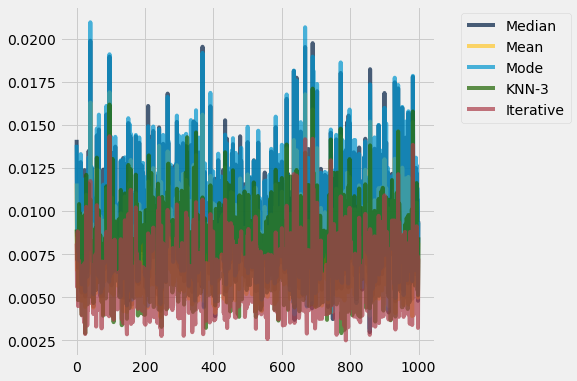

In [11]:
results_table = Table.from_df(results)
results_table.plot()

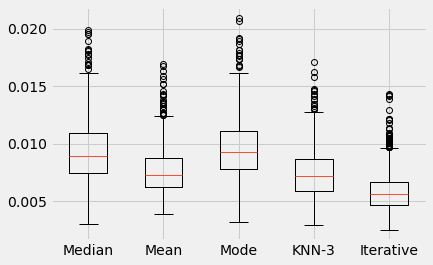

In [12]:
results_table.boxplot()

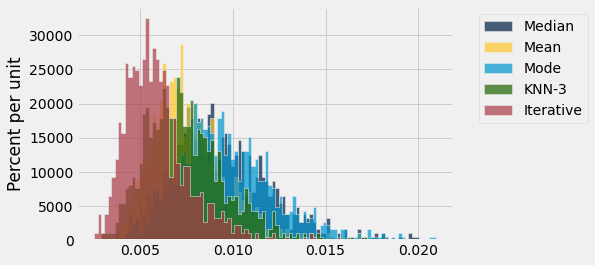

In [13]:
results_table.hist(bins=100)

In [14]:
trials = 1000
results_2 = pd.DataFrame([simulate(SimpleImputer(missing_values=np.nan, strategy='median'),housing_arr, trials,percent_missing=.5), 
              simulate(SimpleImputer(missing_values=np.nan, strategy='mean'), housing_arr, trials,percent_missing=.5),
              simulate(SimpleImputer(missing_values=np.nan, strategy='most_frequent'), housing_arr, trials,percent_missing=.5),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=3), housing_arr, trials,percent_missing=.5),
              simulate(IterativeImputer(random_state=0), housing_arr, trials,percent_missing=.5)
             ]).T
results_2.columns = ['Median', 'Mean', 'Mode', 'KNN-3', 'Iterative']

,Median,Mean,Mode,KNN-3,Iterative
0,0.053474,0.045106,0.054116,0.043813,0.036769
1,0.042759,0.034068,0.044415,0.032917,0.024348
2,0.048870,0.038089,0.050692,0.037591,0.030721
3,0.041197,0.034508,0.042130,0.031878,0.025043
4,0.045119,0.035685,0.044110,0.033336,0.025444
...,...,...,...,...,...
995,0.047048,0.038458,0.047555,0.038235,0.030129
996,0.054248,0.044429,0.055021,0.045745,0.035868
997,0.043909,0.035148,0.044600,0.038579,0.028522
998,0.038691,0.031457,0.040271,0.031747,0.023514


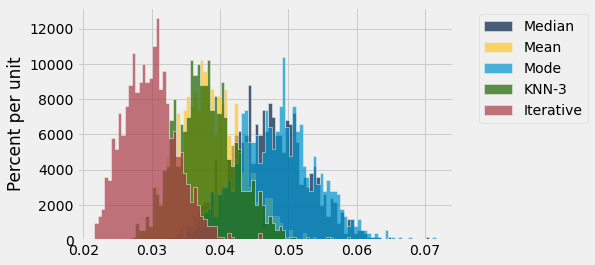

In [15]:
results_table_2 = Table.from_df(results_2)
results_table_2.hist(bins=100)

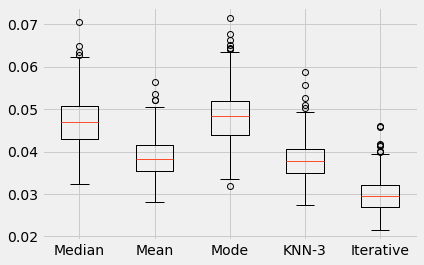

In [16]:
results_table_2.boxplot()

In [17]:
trials = 1000
results_3 = pd.DataFrame([simulate(SimpleImputer(missing_values=np.nan, strategy='median'),housing_arr, trials,remove_random_features_row_independent,.10), 
              simulate(SimpleImputer(missing_values=np.nan, strategy='mean'), housing_arr, trials, remove_random_features_row_independent, .10),
              simulate(SimpleImputer(missing_values=np.nan, strategy='most_frequent'), housing_arr, trials, remove_random_features_row_independent, .10),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=3), housing_arr, trials, remove_random_features_row_independent, .10),
              simulate(IterativeImputer(random_state=0), housing_arr, trials, remove_random_features_row_independent, .10)
             ]).T
results_3.columns = ['Median', 'Mean', 'Mode', 'KNN-3', 'Iterative']

,Median,Mean,Mode,KNN-3,Iterative
0,0.122334,0.112345,0.133559,0.101063,0.080155
1,0.116922,0.101003,0.112543,0.099845,0.076324
2,0.100809,0.093219,0.116995,0.102637,0.079092
3,0.128313,0.090548,0.129121,0.104455,0.079579
4,0.128534,0.096414,0.116908,0.103636,0.076295
...,...,...,...,...,...
995,0.113418,0.103989,0.123858,0.097303,0.086480
996,0.126703,0.109523,0.128668,0.105800,0.073724
997,0.101401,0.098605,0.145146,0.097829,0.083938
998,0.133764,0.104478,0.120966,0.102476,0.070166


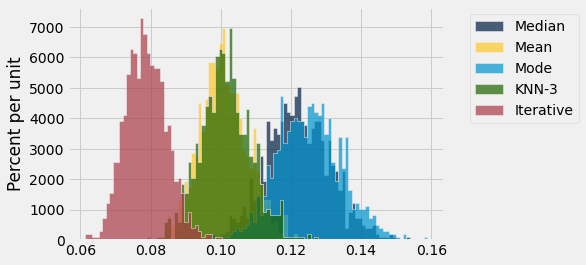

In [18]:
results_table_3 = Table.from_df(results_3)
results_table_3.hist(bins=100)

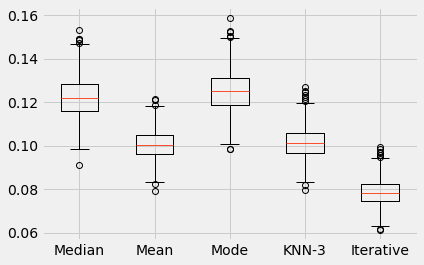

In [19]:
results_table_3.boxplot()

In [20]:
choose_best_k = pd.DataFrame([
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=1), housing_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=2), housing_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=3), housing_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=4), housing_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=5), housing_arr, trials), 
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=6), housing_arr, trials), 
             ]).T
choose_best_k.columns = ['K=1', 'K=2', 'K=3', 'K=4', 'K=5', 'K=6']

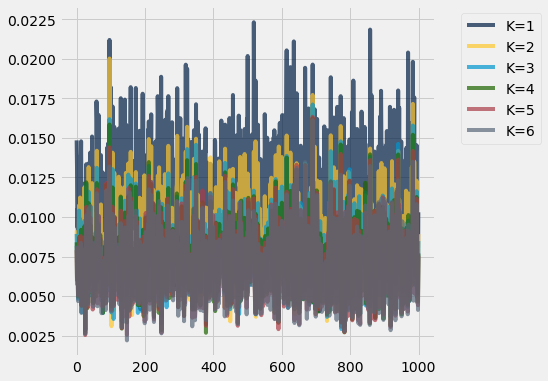

In [21]:
k_table = Table.from_df(choose_best_k)
k_table.plot()

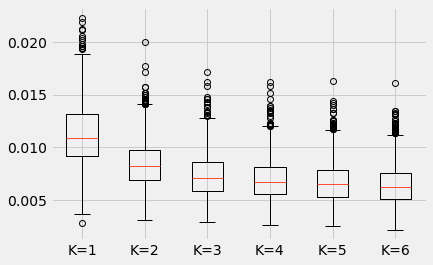

In [22]:
k_table.boxplot()

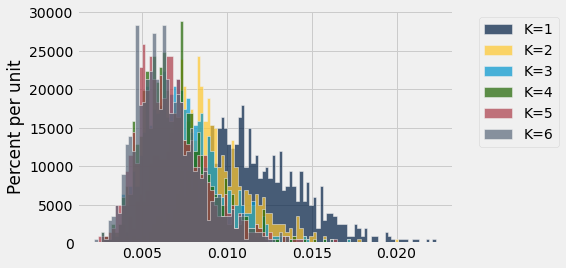

In [23]:
k_table.hist(bins=100)